**DEEP LEARNING**

**ASSIGNMENT 7**.: Vanilla & Denoising auto encoders

NAME: GABRIEL JOSHUA . R

REG. NO.: 20MIA1100

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense

#Importing fashion-MNIST

In [ ]:
from keras.datasets import mnist
import numpy as np
import tensorflow as tf
import keras
(x_train, _), (x_test,_) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


#Vanilla autocoders

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Convolution2D, MaxPooling2D, Dropout, Flatten

In [ ]:
import keras
from keras import layers


encoding_dim = 32

# This is our input image
input_img = keras.Input(shape=(784,))

encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

decoded = layers.Dense(784, activation='sigmoid')(encoded)


autoencoder = keras.Model(input_img, decoded)

In [ ]:
encoder = keras.Model(input_img, encoded)

In [ ]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 4s 13ms/step - loss: 0.4093 - val_loss: 0.3398
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.3271 - val_loss: 0.3206
Epoch 3/50
235/235 [==============================] - 4s 16ms/step - loss: 0.3125 - val_loss: 0.3088
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.3026 - val_loss: 0.3009
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.2961 - val_loss: 0.2959
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.2919 - val_loss: 0.2926
Epoch 7/50
235/235 [==============================] - 3s 14ms/step - loss: 0.2894 - val_loss: 0.2906
Epoch 8/50
235/235 [==============================] - 3s 13ms/step - loss: 0.2878 - val_loss: 0.2894
Epoch 9/50
235/235 [==============================] - 3s 11ms/step - loss: 0.2868 - val_loss: 0.2886
Epoch 10/50
235/235 [==============================] - 3s 11ms/step - loss: 0.2861 - val_lo

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


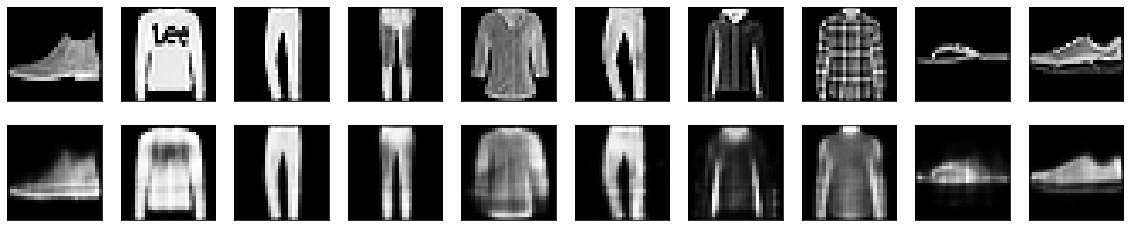

In [ ]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

* For the above, we can observe the reconstruction loss as 0.28 for vanilla autoencoders

#DeNoising autoencoders

In [ ]:

(x_train, _), (x_test,_) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

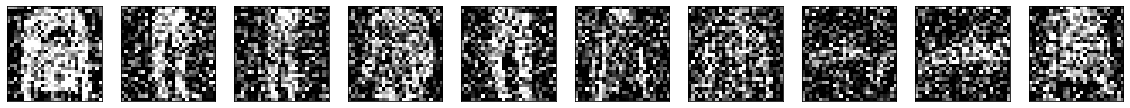

In [ ]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
import keras
from keras import layers
import tensorflow as tf
from keras.callbacks import TensorBoard


encoding_dim = 32

# This is our input image
input_img = keras.Input(shape=(784,))

encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

decoded = layers.Dense(784, activation='sigmoid')(encoded)


autoencoder = keras.Model(input_img, decoded)

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                )

Epoch 1/50
469/469 [==============================] - 5s 10ms/step - loss: 0.3045 - val_loss: 0.3073
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 0.3045 - val_loss: 0.3071
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 0.3043 - val_loss: 0.3073
Epoch 4/50
469/469 [==============================] - 4s 9ms/step - loss: 0.3043 - val_loss: 0.3072
Epoch 5/50
469/469 [==============================] - 4s 9ms/step - loss: 0.3043 - val_loss: 0.3070
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.3042 - val_loss: 0.3069
Epoch 7/50
469/469 [==============================] - 4s 9ms/step - loss: 0.3041 - val_loss: 0.3069
Epoch 8/50
469/469 [==============================] - 4s 9ms/step - loss: 0.3041 - val_loss: 0.3068
Epoch 9/50
469/469 [==============================] - 4s 8ms/step - loss: 0.3040 - val_loss: 0.3069
Epoch 10/50
469/469 [==============================] - 4s 9ms/step - loss: 0.3039 - val_loss: 0.306

In [ ]:
encoder = keras.Model(input_img, encoded)

In [ ]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


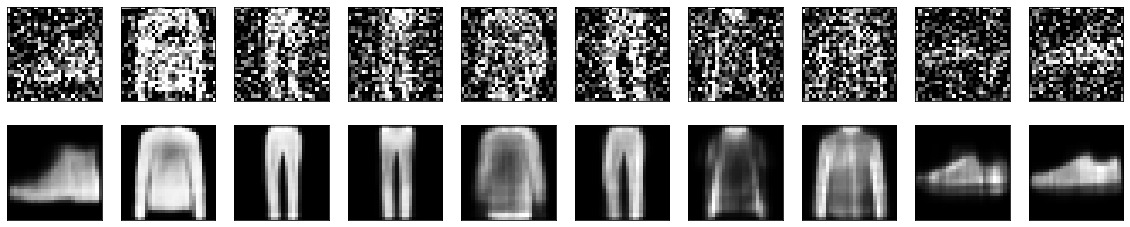

In [ ]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

* For the above, we can observe the reconstruction loss as 0.30 for denoising autoencoders